In [1]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#실적 데이터
sales = pd.read_excel("./Data/processing_data_ot_playtime_rating.xlsx")
sales

,timestemp,month,day,hour,minute,dayofweek,playtime,uniquecode,productcode,productname,category,small_category,rating,price,profit
0,2019-01-01 06:00:00,1,1,6,0,1,20,100346,201072,테이트 남성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,2099000
1,2019-01-01 06:00:00,1,1,6,0,1,20,100346,201079,테이트 여성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,4371000
2,2019-01-01 06:20:00,1,1,6,20,1,20,100346,201072,테이트 남성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,3262000
3,2019-01-01 06:20:00,1,1,6,20,1,20,100346,201079,테이트 여성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,6955000
4,2019-01-01 06:40:00,1,1,6,40,1,20,100346,201072,테이트 남성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,6672000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,2019-12-31 23:20:00,12,31,23,20,1,20,100448,201391,일시불쿠첸압력밥솥 6인용,주방,주방가전,0.000,148000,1664000
37364,2019-12-31 23:40:00,12,31,23,40,1,20,100448,201383,무이자쿠첸압력밥솥 10인용,주방,주방가전,0.412,178000,9149000
37365,2019-12-31 23:40:00,12,31,23,40,1,20,100448,201390,일시불쿠첸압력밥솥 10인용,주방,주방가전,0.412,168000,15282000
37366,2019-12-31 23:40:00,12,31,23,40,1,20,100448,201384,무이자쿠첸압력밥솥 6인용,주방,주방가전,0.412,158000,2328000


In [3]:
#실적데이터 정보
#profit 칼럼에 결측치가 있다.(무형 상품)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37368 entries, 0 to 37367
Data columns (total 15 columns):
timestemp         37368 non-null datetime64[ns]
month             37368 non-null int64
day               37368 non-null int64
hour              37368 non-null int64
minute            37368 non-null int64
dayofweek         37368 non-null int64
playtime          37368 non-null int64
uniquecode        37368 non-null int64
productcode       37368 non-null int64
productname       37368 non-null object
category          37368 non-null object
small_category    37368 non-null object
rating            37368 non-null float64
price             37368 non-null int64
profit            37368 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(10), object(3)
memory usage: 4.3+ MB


In [6]:
sales

,timestemp,month,day,hour,minute,dayofweek,playtime,uniquecode,productcode,productname,category,small_category,rating,price,profit
0,2019-01-01 06:00:00,1,1,6,0,1,20,100346,201072,테이트 남성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,2099000
1,2019-01-01 06:00:00,1,1,6,0,1,20,100346,201079,테이트 여성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,4371000
2,2019-01-01 06:20:00,1,1,6,20,1,20,100346,201072,테이트 남성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,3262000
3,2019-01-01 06:20:00,1,1,6,20,1,20,100346,201079,테이트 여성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,6955000
4,2019-01-01 06:40:00,1,1,6,40,1,20,100346,201072,테이트 남성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,6672000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,2019-12-31 23:20:00,12,31,23,20,1,20,100448,201391,일시불쿠첸압력밥솥 6인용,주방,주방가전,0.000,148000,1664000
37364,2019-12-31 23:40:00,12,31,23,40,1,20,100448,201383,무이자쿠첸압력밥솥 10인용,주방,주방가전,0.412,178000,9149000
37365,2019-12-31 23:40:00,12,31,23,40,1,20,100448,201390,일시불쿠첸압력밥솥 10인용,주방,주방가전,0.412,168000,15282000
37366,2019-12-31 23:40:00,12,31,23,40,1,20,100448,201384,무이자쿠첸압력밥솥 6인용,주방,주방가전,0.412,158000,2328000


In [20]:
#카테고리별로 빈도수를 보기위해 label을 만들고
label=sales['category'].value_counts().index.tolist()
label

['주방', '가전', '의류', '속옷', '잡화', '농수축', '생활용품', '가구', '이미용', '건강기능', '침구']

In [21]:
sales['category'].value_counts()

주방      6600
가전      6479
의류      4340
속옷      3919
잡화      3891
농수축     3884
생활용품    2877
가구      2614
이미용     1305
건강기능     790
침구       669
Name: category, dtype: int64

In [22]:
#label리스트를 index에 저장
index=np.arange(len(label))

In [23]:
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [24]:
#그래프를 그릴 때 한글을 볼 수 있게함
import os
os.name


# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

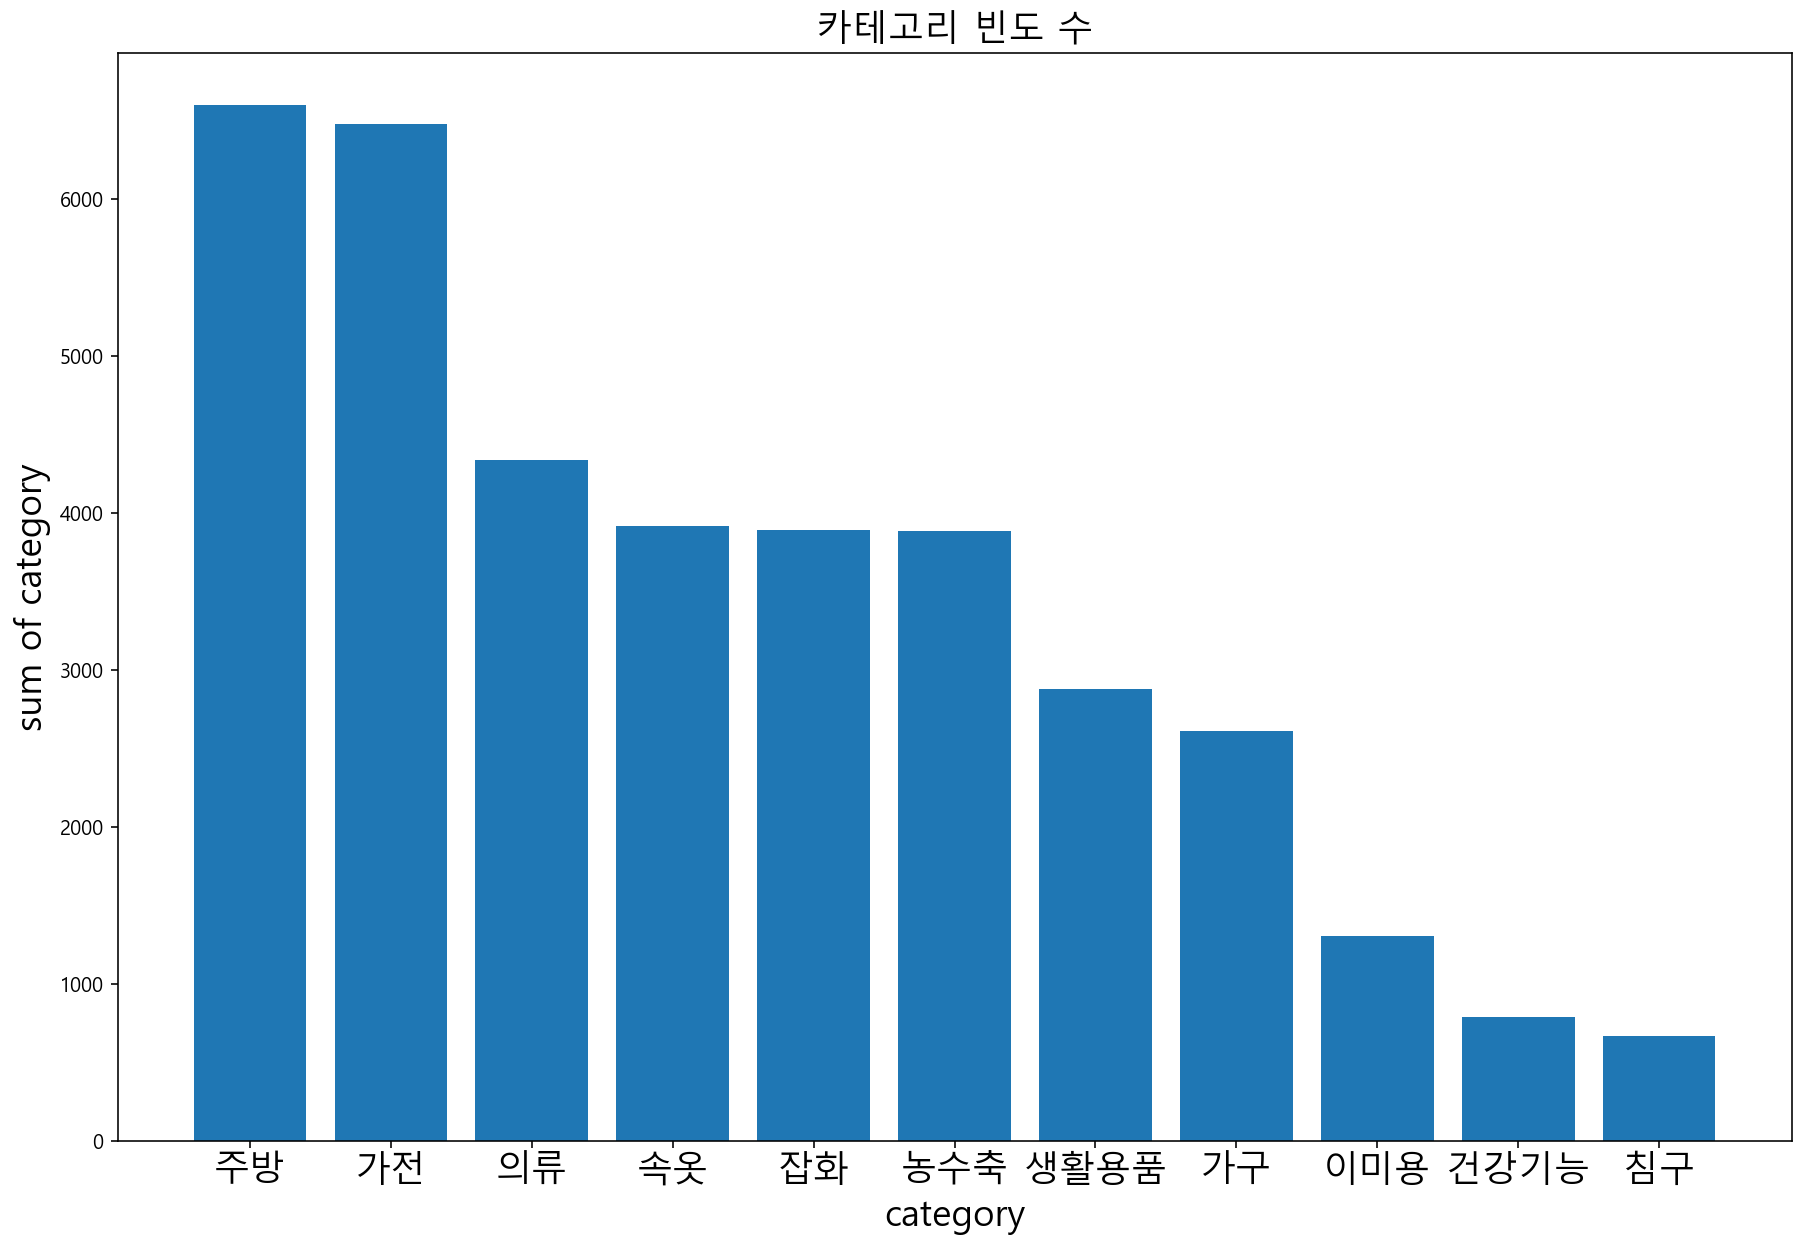

In [25]:
#카테고리별 빈도수 그래프
plt.figure(figsize=(15,10 ))
plt.bar(index, sales['category'].value_counts())
plt.title('카테고리 빈도 수', fontsize=18)
plt.xlabel('category', fontsize=18)
plt.ylabel('sum of category', fontsize=18)
plt.xticks(index, label, fontsize=18)
plt.show()

In [26]:
#카테고리별 profit 그래프를 그리기위해 label을 만들고
label=[ "침구","건강기능","가구","이미용","생활용품","잡화","가전","속옷","의류","주방","농수축"]

In [31]:
index=['가구', '가전', '건강기능', '농수축', '생활용품', '속옷', '의류', '이미용', '잡화', '주방', '침구']

In [36]:
sales.groupby(sales['category'])['profit'].sum().index

Index(['가구', '가전', '건강기능', '농수축', '생활용품', '속옷', '의류', '이미용', '잡화', '주방', '침구'], dtype='object', name='category')

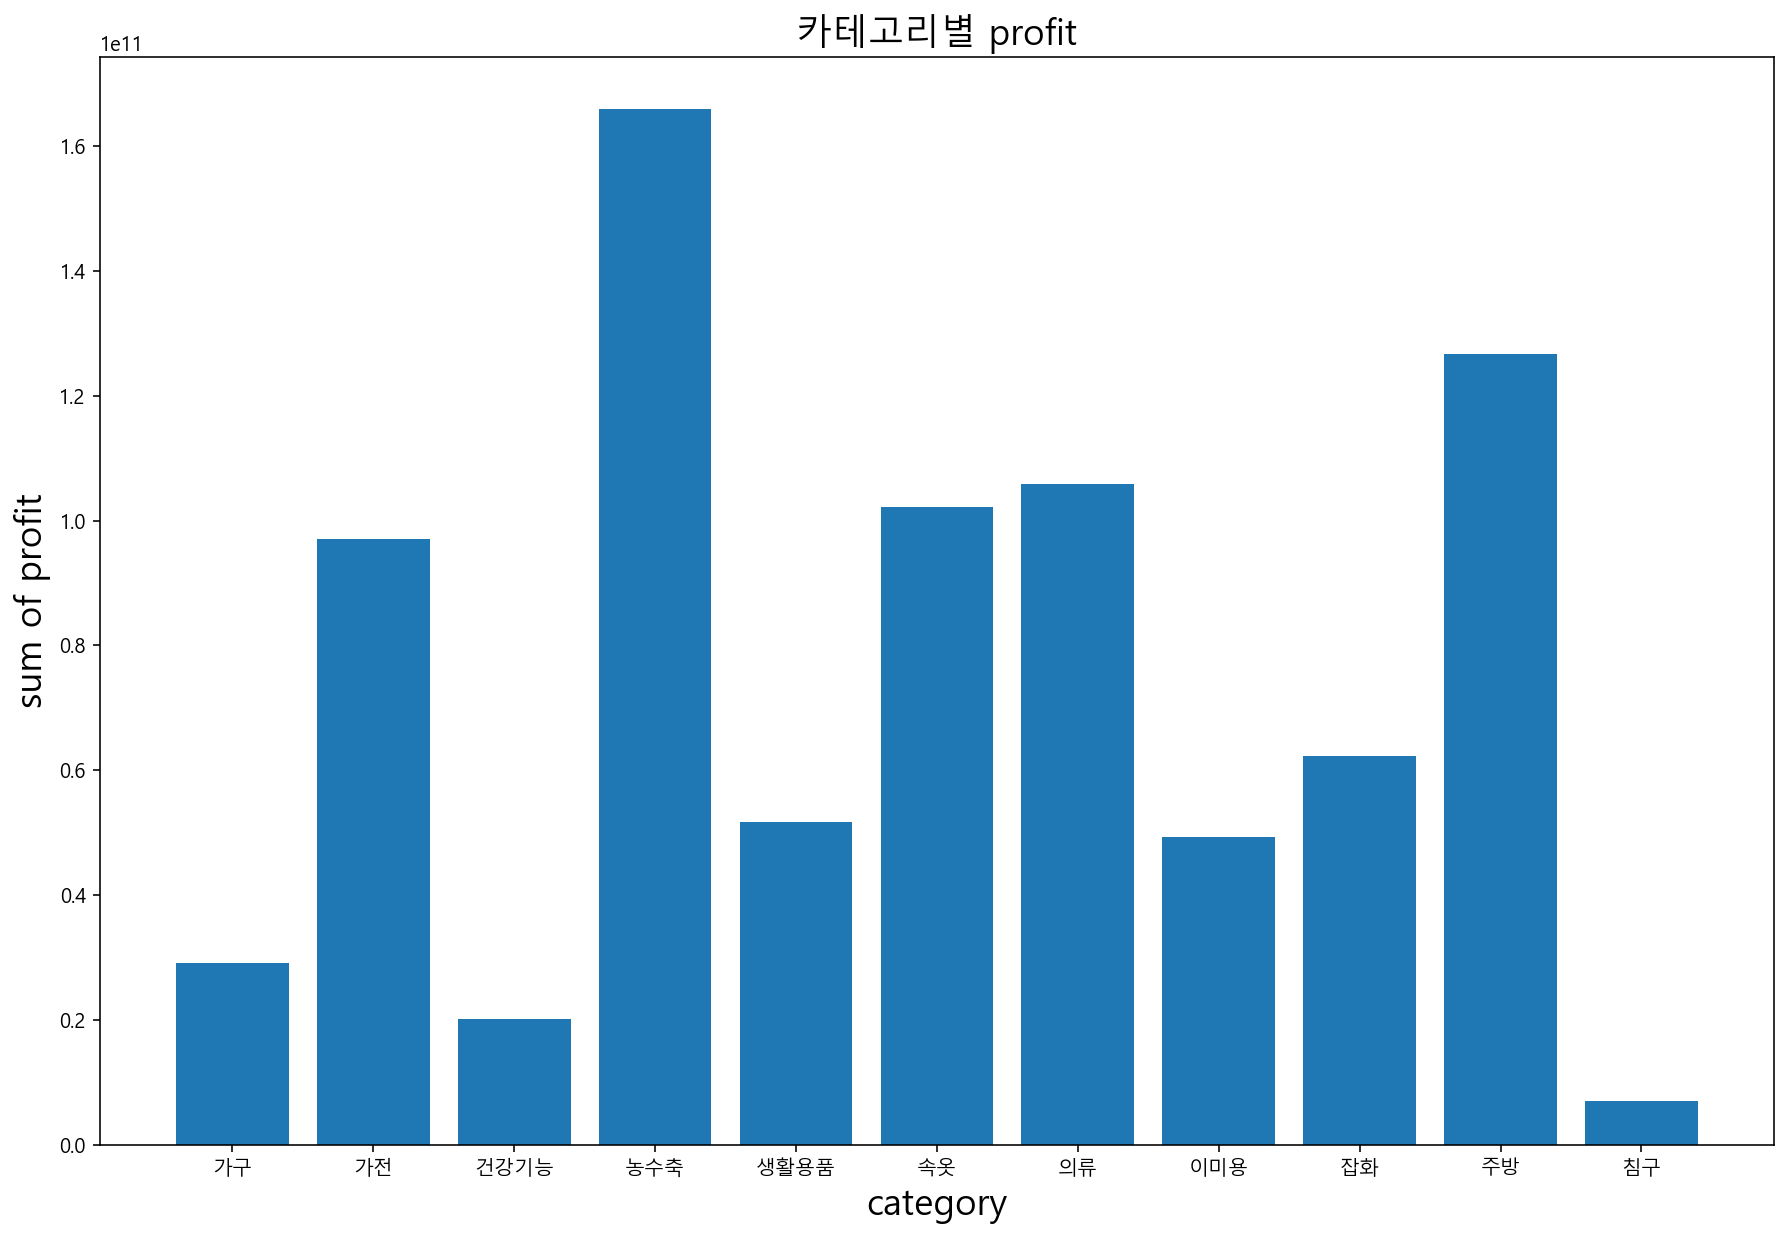

In [37]:
plt.figure(figsize=(15,10 ))
plt.bar(sales.groupby(sales['category'])['profit'].sum().index, sales.groupby(sales['category'])['profit'].sum())
plt.title('카테고리별 profit', fontsize=18)
plt.xlabel('category', fontsize=18)
plt.ylabel('sum of profit', fontsize=18)
plt.show()

In [24]:
#농수축은 방송빈도에 비해 profit이 높다.
#가전은 방송빈도에 비해 profit이 낮았다.

#여기까지 방송빈도와 profit을 비교하는 소스코드

In [25]:
#시청률 일별 profit 비교하는 소스 코드

In [38]:
#날짜별 판매실적
sales

,timestemp,month,day,hour,minute,dayofweek,playtime,uniquecode,productcode,productname,category,small_category,rating,price,profit
0,2019-01-01 06:00:00,1,1,6,0,1,20,100346,201072,테이트 남성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,2099000
1,2019-01-01 06:00:00,1,1,6,0,1,20,100346,201079,테이트 여성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,4371000
2,2019-01-01 06:20:00,1,1,6,20,1,20,100346,201072,테이트 남성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,3262000
3,2019-01-01 06:20:00,1,1,6,20,1,20,100346,201079,테이트 여성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,6955000
4,2019-01-01 06:40:00,1,1,6,40,1,20,100346,201072,테이트 남성 셀린니트3종,의류,티셔츠/스웨터,0.000,39900,6672000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,2019-12-31 23:20:00,12,31,23,20,1,20,100448,201391,일시불쿠첸압력밥솥 6인용,주방,주방가전,0.000,148000,1664000
37364,2019-12-31 23:40:00,12,31,23,40,1,20,100448,201383,무이자쿠첸압력밥솥 10인용,주방,주방가전,0.412,178000,9149000
37365,2019-12-31 23:40:00,12,31,23,40,1,20,100448,201390,일시불쿠첸압력밥솥 10인용,주방,주방가전,0.412,168000,15282000
37366,2019-12-31 23:40:00,12,31,23,40,1,20,100448,201384,무이자쿠첸압력밥솥 6인용,주방,주방가전,0.412,158000,2328000


In [40]:
mon_profit=0
tue_profit=0
wed_profit=0
thu_profit=0
fri_profit=0
sat_profit=0
sun_profit=0

In [41]:
#timestemp열의 데이터 형태를 datetime으로 변경
sales['timestemp'] = sales['timestemp'].astype('datetime64[ns]')
sales['timestemp']

0       2019-01-01 06:00:00
1       2019-01-01 06:00:00
2       2019-01-01 06:20:00
3       2019-01-01 06:20:00
4       2019-01-01 06:40:00
                ...        
37363   2019-12-31 23:20:00
37364   2019-12-31 23:40:00
37365   2019-12-31 23:40:00
37366   2019-12-31 23:40:00
37367   2019-12-31 23:40:00
Name: timestemp, Length: 37368, dtype: datetime64[ns]

In [42]:
sales['profit'].fillna(0,inplace=True)

In [43]:
sum(sales['profit'].isna())

0

In [44]:
sales.loc[1,'profit']

4371000

In [46]:
#일자별 profit 구하기
for i in sales.index:
    if sales.loc[i, 'dayofweek'] ==0:
        mon_profit=mon_profit+sales.loc[i,'profit']
    if sales.loc[i, 'dayofweek'] ==1:
        tue_profit=tue_profit+sales.loc[i,'profit']
    if sales.loc[i, 'dayofweek']==2:
        wed_profit=wed_profit+sales.loc[i,'profit']
    if sales.loc[i, 'dayofweek'] ==3:
        thu_profit=thu_profit+sales.loc[i,'profit']
    if sales.loc[i, 'dayofweek'] ==4:
        fri_profit=fri_profit+sales.loc[i,'profit']
    if sales.loc[i, 'dayofweek']==5:
        sat_profit=sat_profit+sales.loc[i,'profit']
    if sales.loc[i, 'dayofweek']==6:
        sun_profit=sun_profit+sales.loc[i,'profit']

In [47]:
print(mon_profit)
print(tue_profit)
print(wed_profit)
print(thu_profit)
print(fri_profit)
print(sat_profit)
print(sun_profit)

110584030000
113753470000
113043196000
111749651000
108405185000
124899870000
134788690000


In [48]:
prof=[mon_profit,tue_profit,wed_profit,thu_profit,fri_profit,sat_profit,sun_profit]
prof

[110584030000,
 113753470000,
 113043196000,
 111749651000,
 108405185000,
 124899870000,
 134788690000]

In [49]:
category=sales['category'].value_counts().index.tolist()
category

['주방', '가전', '의류', '속옷', '잡화', '농수축', '생활용품', '가구', '이미용', '건강기능', '침구']

In [56]:
mon_data={"category":category,
     "count":[0,0,0,0,0,0,0,0,0,0,0]}
tue_data={"category":category,
     "count":[0,0,0,0,0,0,0,0,0,0,0]}
wed_data={"category":category,
     "count":[0,0,0,0,0,0,0,0,0,0,0]}
thu_data={"category":category,
     "count":[0,0,0,0,0,0,0,0,0,0,0]}
fri_data={"category":category,
     "count":[0,0,0,0,0,0,0,0,0,0,0]}
sat_data={"category":category,
     "count":[0,0,0,0,0,0,0,0,0,0,0]}
sun_data={"category":category,
     "count":[0,0,0,0,0,0,0,0,0,0,0]}


In [57]:
for i in sales.index:
    if sales.loc[i, 'dayofweek'] ==0:
        mon_data["count"][category.index(sales.loc[i,'category'])]= mon_data["count"][category.index(sales.loc[i,'category'])]+1
    if sales.loc[i, 'dayofweek'] ==1:
        tue_data["count"][category.index(sales.loc[i,'category'])]= tue_data["count"][category.index(sales.loc[i,'category'])]+1
    if sales.loc[i, 'dayofweek'] ==2:
        wed_data["count"][category.index(sales.loc[i,'category'])]= wed_data["count"][category.index(sales.loc[i,'category'])]+1
    if sales.loc[i, 'dayofweek'] ==3:
        thu_data["count"][category.index(sales.loc[i,'category'])]= thu_data["count"][category.index(sales.loc[i,'category'])]+1
    if sales.loc[i, 'dayofweek'] ==4:
        fri_data["count"][category.index(sales.loc[i,'category'])]= fri_data["count"][category.index(sales.loc[i,'category'])]+1
    if sales.loc[i, 'dayofweek']  ==5:
        sat_data["count"][category.index(sales.loc[i,'category'])]= sat_data["count"][category.index(sales.loc[i,'category'])]+1
    if sales.loc[i, 'dayofweek'] ==6:
        sun_data["count"][category.index(sales.loc[i,'category'])]= sun_data["count"][category.index(sales.loc[i,'category'])]+1


In [58]:
print(mon_data)
print(tue_data)
print(wed_data)
print(thu_data)
print(fri_data)
print(sat_data)
print(sun_data)

{'category': ['주방', '가전', '의류', '속옷', '잡화', '농수축', '생활용품', '가구', '이미용', '건강기능', '침구'], 'count': [970, 701, 574, 594, 515, 619, 445, 435, 179, 97, 108]}
{'category': ['주방', '가전', '의류', '속옷', '잡화', '농수축', '생활용품', '가구', '이미용', '건강기능', '침구'], 'count': [1121, 753, 567, 657, 578, 610, 360, 360, 206, 116, 93]}
{'category': ['주방', '가전', '의류', '속옷', '잡화', '농수축', '생활용품', '가구', '이미용', '건강기능', '침구'], 'count': [1113, 846, 547, 514, 520, 578, 404, 420, 186, 128, 180]}
{'category': ['주방', '가전', '의류', '속옷', '잡화', '농수축', '생활용품', '가구', '이미용', '건강기능', '침구'], 'count': [899, 949, 530, 514, 573, 605, 457, 339, 173, 168, 105]}
{'category': ['주방', '가전', '의류', '속옷', '잡화', '농수축', '생활용품', '가구', '이미용', '건강기능', '침구'], 'count': [927, 817, 495, 567, 623, 533, 463, 405, 179, 143, 60]}
{'category': ['주방', '가전', '의류', '속옷', '잡화', '농수축', '생활용품', '가구', '이미용', '건강기능', '침구'], 'count': [696, 1152, 813, 488, 660, 503, 343, 273, 173, 66, 15]}
{'category': ['주방', '가전', '의류', '속옷', '잡화', '농수축', '생활용품', '가구', '이미용', '건강기능', '침구'

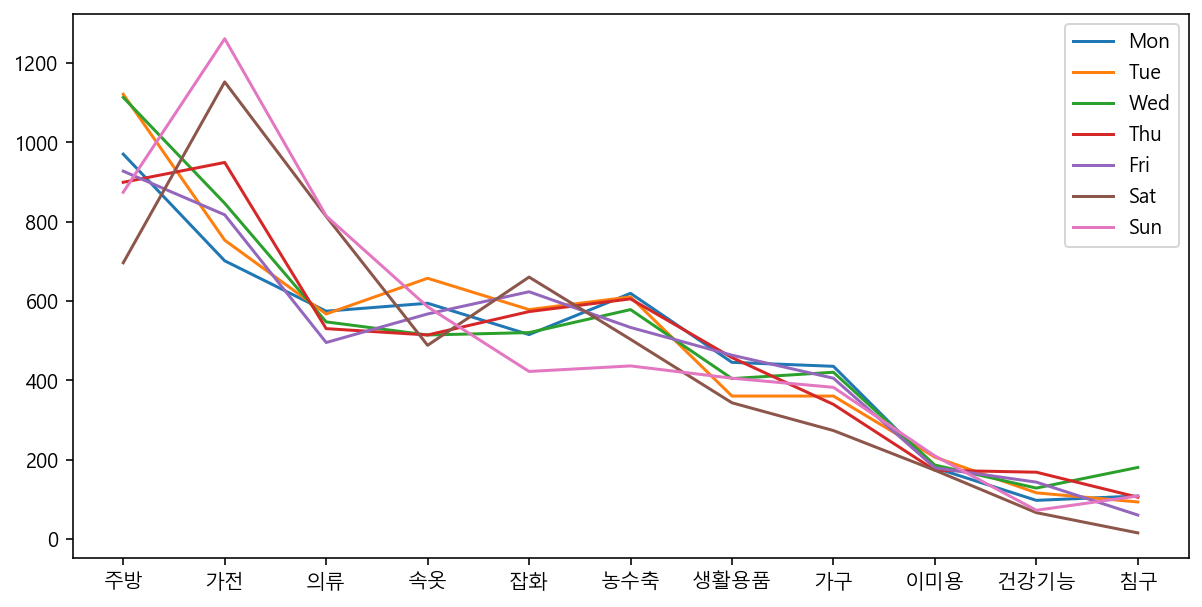

In [59]:
plt.figure(figsize=(10,5))
x=mon_data["category"]
y0=mon_data["count"]
y1=tue_data["count"]
y2=wed_data["count"]
y3=thu_data["count"]
y4=fri_data["count"]
y5=sat_data["count"]
y6=sun_data["count"]

plt.plot(x,y0,'-')
plt.plot(x,y1,'-')
plt.plot(x,y2,'-')
plt.plot(x,y3,'-')
plt.plot(x,y4,'-')
plt.plot(x,y5,'-')
plt.plot(x,y6,'-')
plt.legend(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.show()

In [103]:
주방={"day":["0","1","2","3","4","5","6"],
   "profit":[0,0,0,0,0,0,0]}
가전={"day":["0","1","2","3","4","5","6"],
   "profit":[0,0,0,0,0,0,0]}
의류={"day":["0","1","2","3","4","5","6"],
   "profit":[0,0,0,0,0,0,0]}
속옷={"day":["0","1","2","3","4","5","6"],
   "profit":[0,0,0,0,0,0,0]}
잡화={"day":["0","1","2","3","4","5","6"],
   "profit":[0,0,0,0,0,0,0]}
농수축={"day":["0","1","2","3","4","5","6"],
   "profit":[0,0,0,0,0,0,0]}
생활용품={"day":["0","1","2","3","4","5","6"],
   "profit":[0,0,0,0,0,0,0]}
가구={"day":["0","1","2","3","4","5","6"],
   "profit":[0,0,0,0,0,0,0]}
이미용={"day":["0","1","2","3","4","5","6"],
   "profit":[0,0,0,0,0,0,0]}
건강기능={"day":["0","1","2","3","4","5","6"],
   "profit":[0,0,0,0,0,0,0]}
침구={"day":["0","1","2","3","4","5","6"],
   "profit":[0,0,0,0,0,0,0]}

In [104]:
day=["0","1","2","3","4","5","6"]

In [105]:
  의류["profit"][day.index("0")]

0

In [106]:
sales.loc[1,'dayofweek']

1

In [107]:
day.index(sales.loc[1,'dayofweek'])

ValueError: 1 is not in list

In [108]:
for i in sales.index:
    if sales.loc[i, 'category']=="주방":
        주방["profit"][sales.loc[i,'dayofweek']]= 주방["profit"][sales.loc[i,'dayofweek']]+1
    if sales.loc[i, 'category']=="가전":
        가전["profit"][sales.loc[i,'dayofweek']]= 가전["profit"][sales.loc[i,'dayofweek']]+1
    if sales.loc[i, 'category']=="의류":
        의류["profit"][sales.loc[i,'dayofweek']]= 의류["profit"][sales.loc[i,'dayofweek']]+1
    if sales.loc[i, 'category']=="속옷":
        속옷["profit"][sales.loc[i,'dayofweek']]= 속옷["profit"][sales.loc[i,'dayofweek']]+1
    if sales.loc[i, 'category']=="잡화":
        잡화["profit"][sales.loc[i,'dayofweek']]= 잡화["profit"][sales.loc[i,'dayofweek']]+1
    if sales.loc[i, 'category']=="농수축":
        농수축["profit"][sales.loc[i,'dayofweek']]= 농수축["profit"][sales.loc[i,'dayofweek']]+1
    if sales.loc[i, 'category']=="생활용품":
        생활용품["profit"][sales.loc[i,'dayofweek']]= 생활용품["profit"][sales.loc[i,'dayofweek']]+1
    if sales.loc[i, 'category']=="가구":
        가구["profit"][sales.loc[i,'dayofweek']]= 가구["profit"][sales.loc[i,'dayofweek']]+1
    if sales.loc[i, 'category']=="이미용":
        이미용["profit"][sales.loc[i,'dayofweek']]= 이미용["profit"][sales.loc[i,'dayofweek']]+1
    if sales.loc[i, 'category']=="건강기능":
        건강기능["profit"][sales.loc[i,'dayofweek']]= 건강기능["profit"][sales.loc[i,'dayofweek']]+1
    if sales.loc[i, 'category']=="침구":
        침구["profit"][sales.loc[i,'dayofweek']]= 침구["profit"][sales.loc[i,'dayofweek']]+1

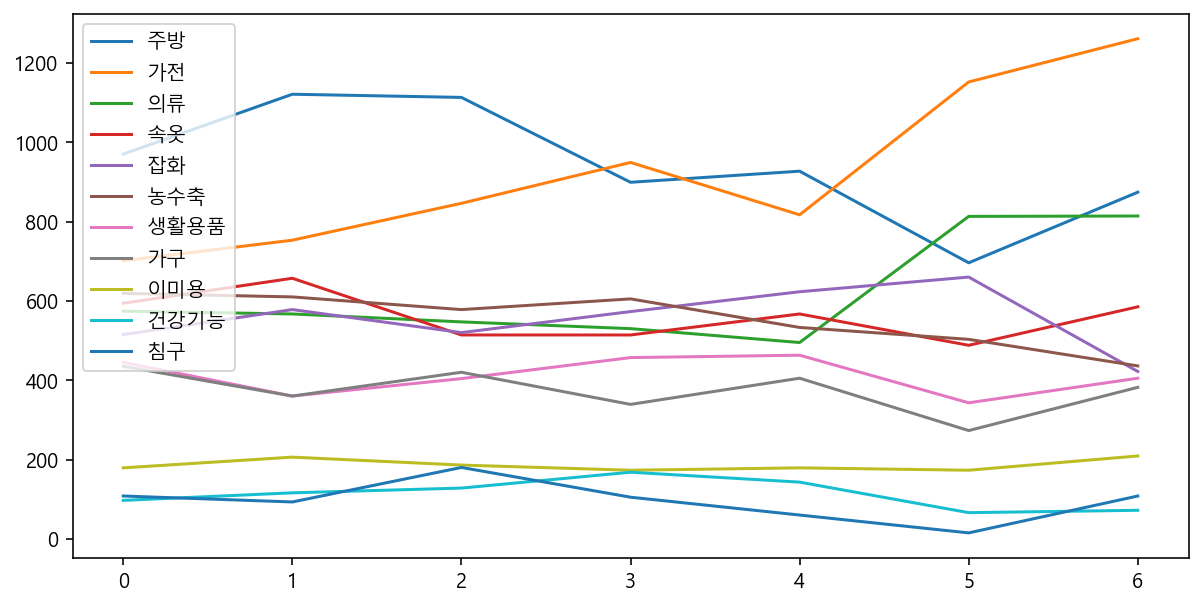

In [109]:
plt.figure(figsize=(10,5))
x=주방["day"]
y0=주방["profit"]
y1=가전["profit"]
y2=의류["profit"]
y3=속옷["profit"]
y4=잡화["profit"]
y5=농수축["profit"]
y6=생활용품["profit"]
y7=가구["profit"]
y8=이미용["profit"]
y9=건강기능["profit"]
y10=침구["profit"]

plt.plot(x,y0,'-')
plt.plot(x,y1,'-')
plt.plot(x,y2,'-')
plt.plot(x,y3,'-')
plt.plot(x,y4,'-')
plt.plot(x,y5,'-')
plt.plot(x,y6,'-')
plt.plot(x,y7,'-')
plt.plot(x,y8,'-')
plt.plot(x,y9,'-')
plt.plot(x,y10,'-')

plt.legend(["주방","가전","의류","속옷","잡화","농수축","생활용품","가구","이미용","건강기능","침구"],loc='upper left')
plt.show()

In [110]:
가전["profit"]

[701, 753, 846, 949, 817, 1152, 1261]